In [1]:
from __future__ import print_function, division
from builtins import range, input
from keras.models import Model
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from glob import glob

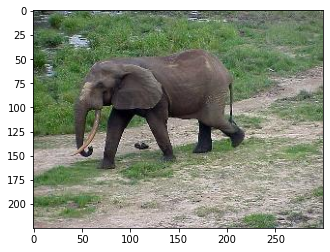

In [3]:
# Get the image files
image_files  = glob(r'C:\Users\Doan Trong Hieu\Downloads\IMPORTANT\SPECIALIZATION\Artificial_Intelligence\COMPUTER VISION\CODING_COMPUTER_VISION\UDM_Lazy_Programmer_Inc_De_Le_Ad_Co_Vi\content\elephant.jpg')
image_files += glob(r'C:\Users\Doan Trong Hieu\Downloads\IMPORTANT\SPECIALIZATION\Artificial_Intelligence\COMPUTER VISION\CODING_COMPUTER_VISION\UDM_Lazy_Programmer_Inc_De_Le_Ad_Co_Vi\content\sydney.jpg')
# Look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [4]:
# Add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)
resnet.summary()


102981632/102967424 [==============================] - 16s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

In [9]:
# Make a model to get output before flatten()
activation_layer = resnet.get_layer('conv5_block3_out')

# Create a model object
model = Model(inputs=resnet.input, outputs=activation_layer.output)

# Get the feature map weights
final_dense = resnet.get_layer('predictions')
W           = final_dense.get_weights()[0]

In [11]:
img  = image.load_img(np.random.choice(image_files), target_size=(224, 224))
x    = preprocess_input(np.expand_dims(img, 0))
fmap = model.predict(x)[0] # 7 x 7 x 2048
fmap

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [14]:
# Get predicted class
probs      = resnet.predict(x)
class_name = decode_predictions(probs)[0]
class_name = class_name[0][1]
pred       = np.argmax(probs[0])

# Get the 2048 weights for the relevant class
w = W[:, pred]

# `dot` w with fmaps
cam = fmap.dot(w)

# Unsample to 224 x 224. (7 x 32 = 224)
cam = sp.ndimage.zoom(cam, (32, 32), order=1)

<function matplotlib.pyplot.show(close=None, block=None)>

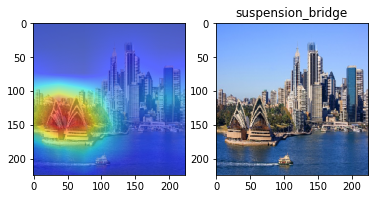

In [15]:
plt.subplot(1, 2, 1)
plt.imshow(img, alpha=0.8)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title(class_name)
plt.show